# Practical 1: Nyeri to Cambridge - Geospatial Data and Reusability

### Radzim Sendyka, University of Cambridge

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### Christian Cabrera, University of Cambridge

### 2025-09-01

**Abstract**: In this lab session we will explore geospatial data using
OpenStreetMap, create reusable code for data science pipelines, and
apply machine learning to classify locations based on geographic
features.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

# Geospatial Data and Machine Learning

## OSMnx Setup

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_software/includes/osmnx-setup.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_software/includes/osmnx-setup.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We start by installing some Python packages. We’ll use OSMnx, a Python
package that makes it easy to download, model, analyze, and visualize
street networks and other spatial data from OpenStreetMap.

In [3]:
%%capture
%pip install osmnx

In [4]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

OSMnx provides a powerful interface to OpenStreetMap data, allowing us
to programmatically access geographic information that would otherwise
require manual browsing of the OpenStreetMap website.

<https://www.openstreetmap.org/search?query=nyeri>

## Geospatial Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-cities-data-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-cities-data-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In data science and machine learning geospatial data is particularly
common and important. Location is the most shared between datasets. Many
good example datasets, and easy to contextualise and visualise.

Open Street Maps (OSM) is an open geographic database that can provide
useful information about different locations and places on the planet.
In this example, we will download data about Nyeri, Kenya and compare it
with Cambridge, England.

Geospatial data provides rich information about the world around us. It
can help us understand patterns in urban development, economic activity,
cultural differences, and infrastructure distribution. By analyzing
features like amenities, buildings, and points of interest, we can build
machine learning models that capture the essence of different places.

## OpenStreetMap Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/openstreetmap-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/openstreetmap-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will download data of Nyeri, Kenya, which has the following latitude
and longitude.

In [5]:
place_name = "Nyeri, Kenya"
latitude = -0.4371
longitude = 36.9580
placestub = place_name.lower().replace(' ', '-').replace(',','')

We’ll create a bounding box which is 0.02 degrees wide, 1 degree is
around 111km (circumference of the Earth is around 40,000 km and
40,000/360=111km). Note: will this approximation work well in all
countries?

In [6]:
box_width = 0.1 # About 11 km
box_height = 0.1
north = latitude + box_height/2
south = latitude - box_height/2
west = longitude - box_width/2
east = longitude + box_width/2
bbox = (west, south, east, north)

This bounding box defines the geographic area we want to analyze. The
choice of size is important - too small and we miss important context,
too large and we may include irrelevant features or face performance
issues.

## Downloading and Visualizing Geospatial Data

## Points of Interest Extraction

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/poi-extraction-osm.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/poi-extraction-osm.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now we’ll download a set of points of interest from OpenStreetMap. We
can specify the points of interest we’re interested in by building a
small dictionary containing their labels as follows. A Point of Interest
is a location with certain importance in the geographic area. They can
vary from amenities to touristic places as you can see in the following.

In [7]:
# Retrieve POIs
tags = {
    "amenity": True,
    "buildings": True,
    "historic": True,
    "leisure": True,
    "shop": True,
    "tourism": True,
    "religion": True,
    "memorial": True
}

We can use osmnx to download all such points of interest within a given
bounding box.

In [8]:
pois = ox.features_from_bbox(bbox, tags)

That operation can take some time, particularly as the bounding box
grows larger. Once it is complete we can check how many points of
interest we have found, and examine their contents in more detail.

In [9]:
print(len(pois))
pois.head()

277


geometry addr:city         addr:street  \
element id                                                                    
node    612947321   POINT (37.00541 -0.39684)   Kiganjo  Nyeri-Nanyuki Road   
        612947324   POINT (37.00127 -0.38741)     Nyeri             Kiganjo   
        711491811   POINT (37.00586 -0.39626)   Kiganjo  Nyeri-Nanyuki Road   
        1170757919  POINT (36.96539 -0.43554)       NaN                 NaN   
        1170757934  POINT (36.96561 -0.43605)       NaN                 NaN   

                            amenity                                 name  \
element id                                                                 
node    612947321            school           Sacred Heart Girls' School   
        612947324              fuel               Savannah Petro Station   
        711491811            school  Sacred Heart Girls Secondary School   
        1170757919       restaurant                Unity Paradise Resort   
        1170757934  public_building      County Council Offices of Nyeri   

                   addr:postcode                   operator cuisine  \
element id                                                            
node    612947321            NaN                        NaN     NaN   
        612947324          10100  Millenium Dealers limited     NaN   
        711491811            NaN                        NaN     NaN   
        1170757919           NaN                        NaN  Kenyan   
        1170757934           NaN                        NaN     NaN   

                   internet_access internet_access:fee  ... surface  \
element id                                              ...           
node    612947321              NaN                 NaN  ...     NaN   
        612947324              NaN                 NaN  ...     NaN   
        711491811              NaN                 NaN  ...     NaN   
        1170757919              no                  no  ...     NaN   
        1170757934             NaN                 NaN  ...     NaN   

                   guest_house rooms addr:suburb museum diocese artwork_type  \
element id                                                                     
node    612947321          NaN   NaN         NaN    NaN     NaN          NaN   
        612947324          NaN   NaN         NaN    NaN     NaN          NaN   
        711491811          NaN   NaN         NaN    NaN     NaN          NaN   
        1170757919         NaN   NaN         NaN    NaN     NaN          NaN   
        1170757934         NaN   NaN         NaN    NaN     NaN          NaN   

                   operator:short operator:wikidata type  
element id                                                
node    612947321             NaN               NaN  NaN  
        612947324             NaN               NaN  NaN  
        711491811             NaN               NaN  NaN  
        1170757919            NaN               NaN  NaN  
        1170757934            NaN               NaN  NaN  

[5 rows x 86 columns]

We notice a few things:

-   Points of interest do not have a consistent OpenStreetMap
    element_type, some are `node`, others are `relation` and we also
    have `way`. You can find out more about elements in OpenStreetMap on
    [this wiki page](https://wiki.openstreetmap.org/wiki/Elements). This
    will become important when tidying up the data for next stage
    processing.

-   Many of the values are missing. In SQL we would express a missing
    value as NULL. But in pandas a missing value is expressed as
    not-a-number, NaN. This is quite a common standard, but it is not
    the only standard. Sometimes data is collected and coded with an
    “unreasonable” value for a missing value. For example, someone might
    set missing values for heights to -999. The concept is that this is
    an obviously void “height” and would trigger a human user to check
    whether it’s a missing value. Of course, this is obvious to humans,
    but not necessarily to a computer!

Nodes, ways and relations in OpenStreetMap all have different keys
associated with them. The data is not structured in standard database
columns. Different points of interest might have different keys present
or absent.

## Visualizing Geographic Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/city-map-visualization.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/city-map-visualization.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

This gives us the relevant points of interest (part of the map). If we’d
like to see the entire street network, we can download the entire graph
from the location.

In [10]:
# Get graph from location
graph = ox.graph_from_bbox(bbox)
# City area
area = ox.geocode_to_gdf(place_name)
# Street network
nodes, edges = ox.graph_to_gdfs(graph)
# Buildings
buildings = ox.features_from_bbox(bbox, tags={"building": True})

Which we can then render as follows.

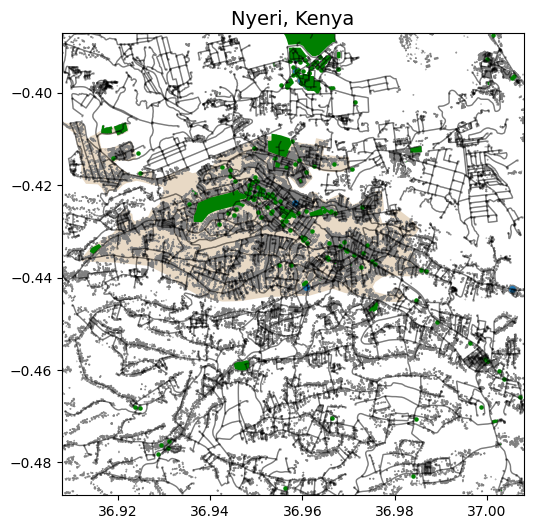

In [11]:
fig, ax = plt.subplots(figsize=(6,6))
area.plot(ax=ax, color="tan", alpha=0.5)
buildings.plot(ax=ax, facecolor="gray", edgecolor="gray")
edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)
nodes.plot(ax=ax, color="black", markersize=1, alpha=0.3)
pois.plot(ax=ax, color="green", markersize=5, alpha=1)
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.set_title(place_name, fontsize=14)
plt.show()

Sanity check. Head over to
https://www.openstreetmap.org/\#map=14/-0.43710/36.95800 and compare
your map against the real thing.

This visualization provides a comprehensive view of the urban landscape,
showing the relationship between different geographic features. The
combination of street networks, buildings, and points of interest gives
us insight into the structure and character of the place.

## Features for Machine Learning

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-feature-extraction.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-feature-extraction.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We have the POI information on all tourist places structured in a
geodataframe. To work with them in a machine learning algorithm, it will
be easier to convert them to a pandas DataFrame.

In [12]:
import pandas as pd

In [13]:
pois_df = pd.DataFrame(pois)
pois_df['latitude'] = pois_df.apply(lambda row: row.geometry.centroid.y, axis=1)
pois_df['longitude'] = pois_df.apply(lambda row: row.geometry.centroid.x, axis=1)

tourist_places_df = pois_df[pois_df.tourism.notnull()]
print(len(tourist_places_df))
tourist_places_df

53


geometry  \
element id                                                               
node    1170757938                            POINT (36.9727 -0.43766)   
        1170757947                           POINT (36.96098 -0.43254)   
        2968784837                           POINT (36.95744 -0.39769)   
        2968791635                           POINT (36.96321 -0.39448)   
        2968794708                           POINT (36.96311 -0.39337)   
        2968798523                           POINT (36.96474 -0.39325)   
        2968799334                           POINT (36.96487 -0.39317)   
        2968799843                           POINT (36.96554 -0.39221)   
        2968804182                           POINT (36.96234 -0.39365)   
        2968805179                           POINT (36.96178 -0.39452)   
        3078569639                           POINT (36.96417 -0.39372)   
        3078569640                           POINT (36.96558 -0.39241)   
        3078569641                           POINT (36.96417 -0.39425)   
        3078569642                           POINT (36.96399 -0.39497)   
        3078569643                           POINT (36.96472 -0.39279)   
        3078569644                           POINT (36.96384 -0.39218)   
        3078569645                            POINT (36.96481 -0.3927)   
        3078628891                           POINT (36.96266 -0.39336)   
        6081237185                           POINT (36.96774 -0.39494)   
        6215841021                           POINT (36.98916 -0.44968)   
        6215953799                           POINT (36.95761 -0.43736)   
        6215953828                           POINT (36.95638 -0.42602)   
        6216117618                           POINT (36.95034 -0.42047)   
        6216117622                           POINT (36.94892 -0.41982)   
        6216117624                            POINT (36.9485 -0.42004)   
        6216117634                           POINT (36.95034 -0.42586)   
        6216117635                             POINT (36.951 -0.42693)   
        6216117638                           POINT (36.94197 -0.42837)   
        6216117644                           POINT (36.96252 -0.41583)   
        8733475517                            POINT (36.9729 -0.42463)   
        11389724776                          POINT (36.96059 -0.43138)   
        12309386444                          POINT (36.95842 -0.39222)   
        12317661163                          POINT (36.95956 -0.39335)   
way     475675499    POLYGON ((36.9364 -0.42132, 36.93625 -0.42118,...   
        475675500    POLYGON ((36.93706 -0.42181, 36.93709 -0.42189...   
        475675517    POLYGON ((36.9367 -0.4214, 36.9368 -0.42147, 3...   
        475675518    POLYGON ((36.93721 -0.42177, 36.93731 -0.42203...   
        1093204657   POLYGON ((36.95403 -0.39359, 36.95401 -0.3935,...   
        1093331235   POLYGON ((36.96429 -0.39497, 36.9642 -0.39489,...   
        1105120586   POLYGON ((36.964 -0.43995, 36.96416 -0.44004, ...   
        1302654607   LINESTRING (36.96089 -0.39425, 36.9609 -0.3941...   
        1392850273   POLYGON ((36.95735 -0.39718, 36.95734 -0.39739...   
        1392850472   POLYGON ((36.95712 -0.39739, 36.95727 -0.39739...   
        1392850593   POLYGON ((36.95733 -0.39817, 36.95751 -0.39817...   
        1392851878   POLYGON ((36.95667 -0.39822, 36.95667 -0.39844...   
        1392852102   POLYGON ((36.95707 -0.39897, 36.95723 -0.39897...   
        1392852103   POLYGON ((36.95663 -0.39886, 36.95663 -0.39891...   
        1393104860   POLYGON ((36.9652 -0.39294, 36.9656 -0.39258, ...   
        1393104861   POLYGON ((36.96521 -0.39254, 36.96531 -0.39244...   
        1393104862   POLYGON ((36.96551 -0.39226, 36.96561 -0.39217...   
        1393105520   POLYGON ((36.9651 -0.39222, 36.96519 -0.39213,...   
        1426106486   POLYGON ((36.93632 -0.42135, 36.93621 -0.42147...   
        1426106487   POLYGON ((36.93629 -0.42126, 36.93614 -0.4214

Now we can create a feature vector by counting different types of points
of interest. This transforms the geographic data into numerical features
that machine learning algorithms can work with.

In [14]:
poi_types = [
    ("amenity", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    ("shop", None),
    ("tourism", None),
    ("tourism", "hotel"),
    ("tourism", "museum"),
    ("leisure", None),
    ("leisure", "park"),
    ("historic", None),
    ("amenity", "place_of_worship"),
]

poi_counts = {}

for key, value in poi_types:
    if key in pois_df.columns:
        if value:  # count only that value
            poi_counts[f"{key}:{value}"] = (pois_df[key] == value).sum()
        else:  # count any non-null entry
            poi_counts[key] = pois_df[key].notnull().sum()
    else:
        poi_counts[f"{key}:{value}" if value else key] = 0

poi_counts_df = pd.DataFrame(list(poi_counts.items()), columns=["POI Type", "Count"])
poi_counts_df # feature vector

,POI Type,Count
0,amenity,176
1,amenity:school,29
2,amenity:hospital,9
3,amenity:restaurant,16
4,amenity:cafe,3
5,shop,14
6,tourism,53
7,tourism:hotel,17
8,tourism:museum,1
9,leisure,28


This creates a feature vector that represents the characteristics of a
place through the count of different amenities and points of interest.
Such features can capture the economic, cultural, and social aspects of
different locations.

### Exercise 1

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-ml-dataset-construction.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_datasets/includes/osm-ml-dataset-construction.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Use the code above to write a function, that given a set of coordinates,
outputs a feature vector.

In [15]:
# Write your answer to Exercise 1 here


features = [
    ("building", None),
    ("amenity", None),
    ("amenity", "school"),
    ("amenity", "hospital"),
    ("amenity", "restaurant"),
    ("amenity", "cafe"),
    ("shop", None),
    ("tourism", None),
    ("tourism", "hotel"),
    ("tourism", "museum"),
    ("leisure", None),
    ("leisure", "park"),
    ("historic", None),
    ("amenity", "place_of_worship"),
]

from osmnx.features import InsufficientResponseError

def get_feature_vector(latitude, longitude, box_size_km=2, features=None):
    """
    Given a central point (latitude, longitude) and a bounding box size,
    query OpenStreetMap via OSMnx and return a feature vector.

    Parameters
    ----------
    latitude : float
        Latitude of the center point.
    longitude : float
        Longitude of the center point.
    box_size_km : float
        Size of the bounding box in kilometers
    features : list of tuples
        List of (key, value) pairs to count. Example:
        [
            ("amenity", None),
            ("amenity", "school"),
            ("shop", None),
            ("tourism", "hotel"),
        ]

    Returns
    -------
    feature_vector : dict
        Dictionary of feature counts, keyed by (key, value).
    """

    # Construct bbox from lat/lon and box_size
    # Using approximate conversion of km to degrees for latitude and longitude
    # 1 degree of latitude is approximately 111 km
    # 1 degree of longitude is approximately 111 * cos(math.radians(latitude)) km
    lat_degree_size = box_size_km / 111.0
    lon_degree_size = box_size_km / (111.0 * math.cos(math.radians(latitude)))

    north = latitude + lat_degree_size / 2
    south = latitude - lat_degree_size / 2
    west = longitude - lon_degree_size / 2
    east = longitude + lon_degree_size / 2
    bbox = (west, south, east, north)

    poi_counts = {}
    try:
        # Query OSMnx for features
        pois = ox.features_from_bbox(bbox, tags={key: True for key, value in features})

        # Count features matching each (key, value) in poi_types
        for key, value in features:
            if key in pois.columns:
                if value:  # count only that value
                    poi_counts[f"{key}:{value}"] = (pois[key] == value).sum()
                else:  # count any non-null entry
                    poi_counts[key] = pois[key].notnull().sum()
            else:
                poi_counts[f"{key}:{value}" if value else key] = 0
    except InsufficientResponseError:
        # Handle case where no features are found by returning counts of 0
        for key, value in features:
            poi_counts[f"{key}:{value}" if value else key] = 0
        print(f"No features found for bounding box around ({latitude}, {longitude}) with size {box_size_km} km.")


    return poi_counts

In [16]:
get_feature_vector(-0.4371,36.9580 , box_size_km=2, features=features)

{'building': np.int64(3335),
 'amenity': np.int64(10),
 'amenity:school': np.int64(0),
 'amenity:hospital': np.int64(0),
 'amenity:restaurant': np.int64(2),
 'amenity:cafe': np.int64(0),
 'shop': np.int64(1),
 'tourism': np.int64(4),
 'tourism:hotel': np.int64(2),
 'tourism:museum': np.int64(1),
 'leisure': np.int64(1),
 'leisure:park': np.int64(0),
 'historic': 0,
 'amenity:place_of_worship': np.int64(2)}

You will want it to query the area around the following cities.

In [17]:
cities_kenya = {
    "Nyeri, Kenya": {"latitude": -0.4371, "longitude": 36.9580},
    "Nairobi, Kenya": {"latitude": -1.2921, "longitude": 36.8219},
    "Mombasa, Kenya": {"latitude": -4.0435, "longitude": 39.6682},
    "Kisumu, Kenya": {"latitude": -0.0917, "longitude": 34.7680}
}

cities_england = {
    "Cambridge, England": {"latitude": 52.2053, "longitude": 0.1218},
    "London, England": {"latitude": 51.5072, "longitude": -0.1276},
    "Sheffield, England": {"latitude": 53.3811, "longitude": -1.4701},
    "Oxford, England": {"latitude": 51.7520, "longitude": -1.2577},
}

In [18]:
# TODO Write your function here
get_feature_vector(-0.4371,36.9580 , box_size_km=2, features=features)

{'building': np.int64(3335),
 'amenity': np.int64(10),
 'amenity:school': np.int64(0),
 'amenity:hospital': np.int64(0),
 'amenity:restaurant': np.int64(2),
 'amenity:cafe': np.int64(0),
 'shop': np.int64(1),
 'tourism': np.int64(4),
 'tourism:hotel': np.int64(2),
 'tourism:museum': np.int64(1),
 'leisure': np.int64(1),
 'leisure:park': np.int64(0),
 'historic': 0,
 'amenity:place_of_worship': np.int64(2)}

In [19]:
get_feature_vector(-0.4371,36.9580 , box_size_km=2, features=features)

{'building': np.int64(3335),
 'amenity': np.int64(10),
 'amenity:school': np.int64(0),
 'amenity:hospital': np.int64(0),
 'amenity:restaurant': np.int64(2),
 'amenity:cafe': np.int64(0),
 'shop': np.int64(1),
 'tourism': np.int64(4),
 'tourism:hotel': np.int64(2),
 'tourism:museum': np.int64(1),
 'leisure': np.int64(1),
 'leisure:park': np.int64(0),
 'historic': 0,
 'amenity:place_of_worship': np.int64(2)}

### Exercise 2

Here we will collect the feature vectors for all cities into one
dataset. If you wrote the above code well, the following should just run
- but do take a minute to understand what’s happening.

### Exercise 2 Answer

Write your answer to Exercise 2 here

In [20]:
pd.set_option('future.no_silent_downcasting', True)

In [21]:
def build_feature_dataframe(city_dicts, features, box_size_km=1):
    results = {}
    for country, cities in city_dicts:
        for city, coords in cities.items():
            vec = get_feature_vector(
                coords["latitude"],
                coords["longitude"],
                box_size_km=box_size_km,
                features=features
            )
            vec["country"] = country
            results[city] = vec
    return pd.DataFrame(results).T

df = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya), ("England", cities_england)], features=features,box_size_km=1)

X = df.drop(columns="country").fillna(0)
y = df["country"]

In [22]:
#display(df)
X


,building,amenity,amenity:school,amenity:hospital,amenity:restaurant,amenity:cafe,shop,tourism,tourism:hotel,tourism:museum,leisure,leisure:park,historic,amenity:place_of_worship
"Nyeri, Kenya",740,0,0,0,0,0,1,1,1,0,1,0,0,0
"Nairobi, Kenya",439,59,1,0,3,1,5,5,1,2,5,3,3,2
"Mombasa, Kenya",548,27,9,1,0,1,3,16,11,0,12,1,0,2
"Kisumu, Kenya",884,71,10,6,0,0,30,2,1,0,5,0,0,9
"Cambridge, England",1053,774,2,0,51,49,298,66,6,5,119,6,20,35
"London, England",787,932,1,0,230,76,248,144,29,4,34,8,118,7
"Sheffield, England",712,941,1,0,67,71,279,68,14,4,198,5,9,12
"Oxford, England",1322,823,4,0,55,78,280,122,15,7,135,4,55,36


## Dimensionality Reduction and Visualization

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_ml/includes/osm-city-classification.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_ml/includes/osm-city-classification.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Dimensionality reduction is a technique used to take data with many
features and compress it into a smaller set of new features that still
capture most of the important patterns. It is not covered in this
practical, but it is very useful for visualising complex datasets in two
or three dimensions, making it easier to spot structure, clusters, or
similarities between observations. We will use it to quickly visualise
the feature vectors we have.

In [23]:
from sklearn.decomposition import PCA

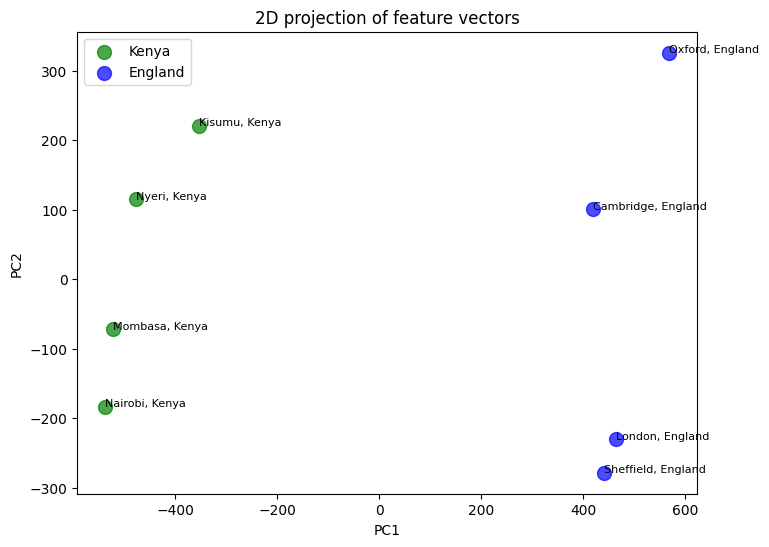

In [24]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X)
plt.figure(figsize=(8,6))
for country, color in [("Kenya", "green"), ("England", "blue")]:
    mask = (y == country)
    plt.scatter(X_proj[mask, 0], X_proj[mask, 1],
                label=country, color=color, s=100, alpha=0.7)

for i, city in enumerate(df.index):
    plt.text(X_proj[i,0]+0.02, X_proj[i,1], city, fontsize=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D projection of feature vectors")
plt.legend()
plt.show()

The visual separation between Kenyan and English cities makes it clear
that a machine learning approach should be successful in classifying
areas as either Kenya or England based on features in the area.

Try a simple classification method of your choosing (eg. linear model)
below, and report the results on the test set below:

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

LogisticRegression(max_iter=1000)

## Testing on New Cities

In [27]:
cities_kenya_2 = {
    "Nakuru, Kenya": {"latitude": -0.3031, "longitude": 36.0800},
    "Eldoret, Kenya": {"latitude": 0.5143, "longitude": 35.2698},
    "Meru, Kenya": {"latitude": 0.0463,"longitude": 37.6559},
    "Kakamega, Kenya": {"latitude": 0.2827,"longitude": 34.7519}
}
cities_england_2 = {
    "Birmingham, England": {"latitude": 52.4862, "longitude": -1.8904},
    "Manchester, England": {"latitude": 53.4808, "longitude": -2.2426},
    "Leeds, England": {"latitude": 53.8008, "longitude": -1.5491},
    "Liverpool, England": {"latitude": 53.4084, "longitude": -2.9916}
}

df_test = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya_2), ("England", cities_england_2)], features=features, box_size_km=1)

X_test = df_test.drop(columns="country").fillna(0)
y_test = df_test["country"]

In [28]:
# TODO: Classify your test set and report results
y_pred = clf.predict(X_test)
y_pred



array(['Kenya', 'Kenya', 'Kenya', 'Kenya', 'England', 'England',
       'England', 'England'], dtype=object)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     England       1.00      1.00      1.00         4
       Kenya       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



That probably worked!

## Dataset Representativeness

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-dataset-representativeness.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-dataset-representativeness.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

But are we sure that we’re seperating for the right reasons? A brief
look at the data above shows us that the England cities have a lot more
OSM features in general, and that will probably be the line along which
our algorithm will end up separating the data. Let’s validate on a very
different set of English towns.

Make sure your code in Exercise 3 handles the case when no features are
found!

In [30]:
cities_england_3 = {
    "Corbridge, England": {"latitude": 54.9740, "longitude": -2.0180},
    "Hexworthy, England": {"latitude": 50.5400, "longitude": -3.8950},
    "Ruckland, England": {"latitude": 53.3000, "longitude": 0.0000},
    "Malmesbury, England": {"latitude": 51.5850, "longitude": -2.0980}
}

df_test_3 = build_feature_dataframe(city_dicts=[ ("England", cities_england_3)], features=features,box_size_km=1)

X_test_3 = df_test_3.drop(columns="country").fillna(0)
y_test_3 = df_test_3["country"]
y_pred_3 = clf.predict(X_test_3)
pd.Series(y_pred_3, index=X_test_3.index)

No features found for bounding box around (53.3, 0.0) with size 1 km.


,0
"Corbridge, England",Kenya
"Hexworthy, England",Kenya
"Ruckland, England",Kenya
"Malmesbury, England",Kenya


What happens when we test on small English towns? This reveals an
important issue in machine learning: *dataset representativeness*. Our
model may be learning to distinguish between large, well-documented
cities in Kenya versus large, well-documented cities in England, rather
than learning the true cultural and geographic differences between the
countries.

### Exercise 3

Based on what you found above, discuss what makes a dataset
representative. What other aspects of the analysis could we improve on?
Come up with a better set of English and Kenyan places to include in
your training data, and improve on the analysis above to find real
differences between these places as seen through openstreetmaps.

Consider the following questions:

1.  *Sampling bias*: Are we comparing like with like? Large cities
    vs. small towns?
2.  *Feature selection*: Are we using features that reflect genuine
    cultural/geographic differences?
3.  *Data availability*: Does OpenStreetMap have equal coverage in both
    countries?
4.  *Urban vs. rural*: Should we control for population size or urban
    development level?
5.  \*\*conomic factors\*: Are we inadvertently learning to distinguish
    economic development levels?

### Exercise 3 Answer

Write your answer to Exercise 3 here

In [31]:
# TODO: discuss
#To improve the analysis, we need a more representative dataset that addresses the sampling bias by including a wider variety of locations (urban, suburban, rural) from both countries.
# We might also need to explore alternative or additional features that are less sensitive to urban density and potentially more indicative of cultural or regional differences, while also considering the potential impact of uneven data availability in OpenStreetMap across different regions.

### Exercise 3 Answer

Based on the results of the previous analysis, particularly the misclassification of smaller English towns as Kenyan, several factors related to dataset representativeness come into play:

1.  **Sampling bias**: The initial training dataset consisted of large, well-known cities in both Kenya and England. These cities, especially the English ones, likely have a high density of OpenStreetMap features. Comparing large cities from two different countries might inadvertently lead the model to learn differences in urbanization or mapping completeness rather than inherent country characteristics. The test on smaller English towns, which likely have fewer OSM features, highlighted this bias as they were classified incorrectly. A more representative sample would include a mix of urban, suburban, and rural areas from both countries, ensuring that the model learns features that generalize beyond just major cities.

2.  **Feature selection**: The current features are counts of various amenities, buildings, and points of interest. While these reflect the characteristics of a place, they might be more strongly correlated with urban density and development level than with country-specific cultural or geographic differences. For instance, a bustling city center in any country might have a high count of restaurants, shops, and hotels, regardless of the country. Features that are more uniquely tied to local customs, architecture, or specific types of services prevalent in one country but not the other might be more discriminatory.

3.  **Data availability**: OpenStreetMap data is crowdsourced, and its completeness and detail can vary significantly between regions and countries. It's possible that OpenStreetMap has more comprehensive coverage in large English cities compared to some areas in Kenya, or even compared to smaller towns within England. This uneven data availability can introduce a bias, where areas with more detailed mapping appear to have more "features," regardless of the actual presence of those features on the ground. The "No features found" message for Ruckland, England, suggests a potential issue with data availability in less mapped areas.

4.  **Urban vs. rural**: The analysis clearly demonstrates the impact of the urban vs. rural nature of the selected cities. The initial training data primarily consisted of urban centers. When tested on smaller, potentially more rural English towns, the model failed. This indicates that the feature vectors derived from urban areas are not representative of rural areas, and the model trained on urban features struggles to classify non-urban locations. A representative dataset should explicitly include locations across the urban-rural spectrum in both countries.

5.  **Economic factors**: The number and types of amenities and points of interest are often correlated with economic development and population density. It is highly probable that the model is picking up on differences in economic activity or infrastructure between the selected cities rather than purely country-specific traits. Wealthier, more developed areas might have more restaurants, cafes, and specialized shops, for example. To mitigate this, one could try to normalize feature counts by population or area, or include features that are less directly tied to economic indicators.

To improve the analysis, we need a more representative dataset that addresses the sampling bias by including a wider variety of locations (urban, suburban, rural) from both countries. We might also need to explore alternative or additional features that are less sensitive to urban density and potentially more indicative of cultural or regional differences, while also considering the potential impact of uneven data availability in OpenStreetMap across different regions.

### Potential New Features from OpenStreetMap:

Based on the discussion of dataset representativeness and the potential for features to reflect urban density or economic development rather than cultural or regional differences, here are some ideas for new features we could include from OpenStreetMap:

*   **Specific Amenity Types**: Instead of just counting all amenities, we could focus on specific types that might be more prevalent or have different characteristics in one country compared to the other. For example:
    *   `amenity:marketplace`: Markets can have distinct roles and appearances in different cultures.
    *   `amenity:community_centre`: These might reflect local social structures and activities.
    *   `amenity:kindergarten` or `amenity:school` sub-types: Educational facilities can vary in structure and prevalence.
    *   `amenity:clinic` or `amenity:pharmacy`: Healthcare access points might differ.
*   **Building Types**: OpenStreetMap has detailed tags for building types (`building=*`). Certain architectural styles or common building uses might be more specific to a region:
    *   `building:residential` sub-types: Differences in housing styles.
    *   `building:religious` sub-types: Specific types of churches, mosques, temples, etc., might be more common in certain areas.
    *   `building:commercial` sub-types: Types of shops or businesses.
*   **Natural Features**: The presence and types of natural features (`natural=*`) could also offer insights:
    *   `natural:water`: Rivers, lakes, or wells might be more significant in certain geographies.
    *   `natural:peak` or `natural:hill`: Topographical features.
    *   `natural:wood` or `natural:forest`: Types of vegetation.
*   **Landuse Types**: How land is used (`landuse=*`) can reflect different patterns of development or agriculture:
    *   `landuse:agricultural` sub-types: Different crops or farming practices.
    *   `landuse:residential` density: Differences in how residential areas are planned.
    *   `landuse:commercial` or `landuse:industrial`: The scale and nature of commercial or industrial zones.
*   **Transportation Infrastructure**: While roads are general, certain types of transportation facilities (`railway=*`, `public_transport=*`) might vary:
    *   `railway:station` or `railway:halt`: Density of train access.
    *   `public_transport:stop_position` or `public_transport:station`: Prevalence of public transit.

By including a more diverse and potentially more culturally or geographically specific set of features, we can hope to build a model that captures more nuanced differences between the locations in Kenya and England, moving beyond just urban concentration. We would need to carefully select which of these features are likely to be well-mapped in both countries to avoid issues with data availability bias.

In [39]:

cities_kenya_new = {
    "Nyeri, Kenya": {"latitude": -0.4371, "longitude": 36.9580},
    "Nairobi, Kenya": {"latitude": -1.2921, "longitude": 36.8219},

    # Added towns/cities
    "Kericho, Kenya": {"latitude": -0.3677, "longitude": 35.2831},
    "Kitale, Kenya": {"latitude": 1.0157, "longitude": 35.0061},
    "Machakos, Kenya": {"latitude": -1.5167, "longitude": 37.2667},
    "Embu, Kenya": {"latitude": -0.5330, "longitude": 37.4500},
    "Nanyuki, Kenya": {"latitude": 0.0167, "longitude": 37.0728},
    "Bungoma, Kenya": {"latitude": 0.5667, "longitude": 34.5667},
    "Voi, Kenya": {"latitude": -3.3961, "longitude": 38.5561},
    "Isiolo, Kenya": {"latitude": 0.3546, "longitude": 37.5822},
    "Kilifi, Kenya": {"latitude": -3.6333, "longitude": 39.8500},
    "Homa Bay, Kenya": {"latitude": -0.5167, "longitude": 34.4500}
}

cities_england_new = {
   "Corbridge, England": {"latitude": 54.9740, "longitude": -2.0180},
    "Hexworthy, England": {"latitude": 50.5400, "longitude": -3.8950},
    "Ruckland, England": {"latitude": 53.3000, "longitude": 0.0000},
    "Malmesbury, England": {"latitude": 51.5850, "longitude": -2.0980},
    # Added towns/cities
    "Shrewsbury, England": {"latitude": 52.7080, "longitude": -2.7540},
    "Kendal, England": {"latitude": 54.3280, "longitude": -2.7460},
    "Hereford, England": {"latitude": 52.0564, "longitude": -2.7160},
    "Louth, England": {"latitude": 53.3667, "longitude": -0.0000},
    "Totnes, England": {"latitude": 50.4312, "longitude": -3.6840},
    "Alnwick, England": {"latitude": 55.4120, "longitude": -1.7050},
    "Ripon, England": {"latitude": 54.1350, "longitude": -1.5200},
    "Sudbury, England": {"latitude": 52.0380, "longitude": 0.7310},
    "Marlborough, England": {"latitude": 51.4210, "longitude": -1.7310},
    "Richmond, England": {"latitude": 54.4040, "longitude": -1.7360}
}

features_new = features # Using the same features for now

df_test_3a = build_feature_dataframe(city_dicts=[ ("England", cities_england_3)], features=features,box_size_km=1)
X_test_3a = df_test_3a.drop(columns="country").fillna(0)
y_test_3a = df_test_3a["country"]

df_new = build_feature_dataframe(city_dicts=[("Kenya", cities_kenya_new), ("England", cities_england_new)], features=features_new,box_size_km=1)
X_new = df_new.drop(columns="country").fillna(0)
y_new = df_new["country"]

clf = LogisticRegression(max_iter=1000)
clf.fit(X_new, y_new)

y_pred_new = clf.predict(X_test_3a)
pd.Series(y_pred_new, index=X_test_3a.index)

No features found for bounding box around (53.3, 0.0) with size 1 km.
No features found for bounding box around (-0.5167, 34.45) with size 1 km.
No features found for bounding box around (53.3, 0.0) with size 1 km.


,0
"Corbridge, England",England
"Hexworthy, England",England
"Ruckland, England",England
"Malmesbury, England",England


A representative dataset requires careful consideration of sampling
strategy, ensuring that we capture the true diversity within each class
while controlling for confounding variables that might lead to spurious
correlations.

## Access, Assess, Address Framework

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-assess-address.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-assess-address.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The Access-Assess-Address framework provides a systematic approach to
data science projects:

-   **Access**: How do we get the data? This includes APIs, web
    scraping, database queries, file formats, etc.
-   **Assess**: How do we evaluate data quality, understand its
    structure, and validate our assumptions?
-   **Address**: How do we answer the specific question or solve the
    problem at hand?

## Applying the Framework

Using the lessons from the article, have a look at the functionality you
created, and identify generalisable Access, Assess and Address
functionality that could come in useful in the future.

**Access functionality**

What we’ve created: - Connection to OpenStreetMap API via OSMnx

What we might need to have done: - Legal, ethical considerations.

**Assess functionality**

What we’ve created: - `plot_city_map()`: visualizes OSM data for any
location - `get_feature_vector()`: Extracts quantitative features from
geographic coordinates - Visualization of geographic data to understand
structure - Feature counting and summarization - Dimensionality
reduction for pattern visualization

What we could create - Data quality checks (handling missing data,
failed queries)

**Address functionality**

What we’ve created: - Machine learning pipeline for location
classification - Evaluation on test sets - Analysis of model performance
and potential biases}

## Library

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-library.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-library.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Consider for example, this reusable library structure:

``` python
# access.py

def get_osm_datapoints(latitude, longitude, box_size_km=2, poi_tags=None):
    # Example function for getting OSM data
    pass

# assess.py  
def plot_city_map(place_name, latitude, longitude, box_size_km=2, poi_tags=None):
    # Access and visualize geographic data
    pass

def get_osm_features(latitude, longitude, box_size_km=2, tags=None):
    # Access raw OSM data
    pass

def get_feature_vector(latitude, longitude, box_size_km=2, features=None):
    # Assess and quantify geographic features
    pass

def visualize_feature_space(X, y, method='PCA'):
    # Assess data distribution and separability
    pass

# address.py
def train_location_classifier(X_train, y_train, model_type='logistic'):
    # Address classification problem
    pass

def evaluate_classifier(model, X_test, y_test):
    # Address evaluation of performance
    pass
```

### Exercise 4

Over the course of this module we will end up reusing a lot of the code
we create. This is on purpose, and a very important aspect of creating
data science pipelines. The goal of this section is to put this idea in
practice.

Have a *skim* through Neil Lawrence’s article on the Access Assess
Address data science framework
[here](https://inverseprobability.com/talks/notes/access-assess-address-a-pipeline-for-automated-data-science.html).

Using the lessons from the article, have a look at the functionality you
created, and identify generalisable Access, Assess and Address
functionality that could come in useful in the future.

Use git to fork this repository:
https://github.com/lawrennd/fynesse_template and include your code in
the `access.py`, `assess.py`, and `address.py` files.

Demonstrate this by importing your repository below and calling a couple
example functions.

This modular approach makes code reusable across different projects and
enables systematic data science workflows. Each module has a clear
responsibility within the overall pipeline.

In [44]:
# Write your answer to Exercise 4 here
!git clone https://github.com/zachmonari/mlfc-projects #Replace YOURGITHUBNAME
import sys
sys.path.append("/content/fynesse_mlfc")

fatal: destination path 'mlfc-projects' already exists and is not an empty directory.


In [57]:
import os, subprocess, importlib, sys

def load_repo(repo):
    local = repo.split("/")[-1]
    if not os.path.exists(local):
        subprocess.run(["git", "clone", f"https://github.com/{repo}.git"], check=True)
    else:
        subprocess.run(["git", "-C", local, "pull"], check=True)
    if local not in sys.path:
        sys.path.insert(0, local)
    # Use importlib to load the module after adding to path
    if local in sys.modules:
        importlib.reload(sys.modules[local])
    else:
        importlib.import_module(local)
    return importlib.import_module(local)

# Use after making changes
fynesse = load_repo("zachmonari/mlfc-projects") # Replace with your repository name

Once you have implemented your functions you should be able to call them
to plot the city map.

In [66]:
import fynesse

In [65]:

fynesse.assess.plot_city_map('Cambridge, England',  52.2053, 0.1218, 2)

AttributeError: module 'mlfc-projects' has no attribute 'assess'

## Bonus

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-bonus.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/snippets/edit/main/_data-science/includes/osm-access-bonus.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

If you made changes to the repository after pulling it, you might have
issues getting the changes to take effect in the workbook without
restarting runtime. Use the workaround below:

    import os, subprocess, importlib, sys

    def load_repo(repo):
        local = repo.split("/")[-1]
        if not os.path.exists(local):
            subprocess.run(["git", "clone", f"https://github.com/{repo}.git"], check=True)
        else:
            subprocess.run(["git", "-C", local, "pull"], check=True)
        if local not in sys.path:
            sys.path.insert(0, local)
        mod = importlib.import_module(local)
        importlib.reload(mod)
        return mod

    # Use after making changes
    fynesse = load_repo("TODO/fynesse_TODO")

End of Practical 1A

     _______  __   __  _______  __    _  ___   _  _______  __
    |       ||  | |  ||   _   ||  |  | ||   | | ||       ||  |
    |_     _||  |_|  ||  |_|  ||   |_| ||   |_| ||  _____||  |
      |   |  |       ||       ||       ||      _|| |_____ |  |
      |   |  |       ||       ||  _    ||     |_ |_____  ||__|
      |   |  |   _   ||   _   || | |   ||    _  | _____| | __
      |___|  |__| |__||__| |__||_|  |__||___| |_||_______||__|

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   book: [The Atomic
    Human](https://www.penguin.co.uk/books/455130/the-atomic-human-by-lawrence-neil-d/9780241625248)
-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

::: {.cell .markdown}

## References

In [54]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
import math

warnings.filterwarnings("ignore", category=FutureWarning, module='osmnx')

def plot_city_map(place_name, latitude, longitude, box_size_km=2, tags=None):
    """
    Visualizes the street network, buildings, and points of interest for a given location.

    Parameters
    ----------
    place_name : str
        The name of the place to visualize.
    latitude : float
        Latitude of the center point.
    longitude : float
        Longitude of the center point.
    box_size_km : float
        Size of the bounding box in kilometers.
    tags : dict
        A dictionary of OpenStreetMap tags to include as points of interest.
    """
    # Construct bbox from lat/lon and box_size
    lat_degree_size = box_size_km / 111.0
    lon_degree_size = box_size_km / (111.0 * math.cos(math.radians(latitude)))

    north = latitude + lat_degree_size / 2
    south = latitude - lat_degree_size / 2
    west = longitude - lon_degree_size / 2
    east = longitude + lon_degree_size / 2
    bbox = (west, south, east, north)

    try:
        # Get graph from location
        graph = ox.graph_from_bbox(bbox, network_type='drive') # Specify network_type
        # City area
        area = ox.geocode_to_gdf(place_name)
        # Street network
        nodes, edges = ox.graph_to_gdfs(graph)
        # Buildings
        buildings = ox.features_from_bbox(bbox, tags={"building": True})
        # POIs
        if tags is None:
            # Use default tags if none are provided
            tags = {
                "amenity": True,
                "buildings": True,
                "historic": True,
                "leisure": True,
                "shop": True,
                "tourism": True,
                "religion": True,
                "memorial": True
            }
        pois = ox.features_from_bbox(bbox, tags=tags)

        fig, ax = plt.subplots(figsize=(8,8))
        area.plot(ax=ax, color="tan", alpha=0.5)
        buildings.plot(ax=ax, facecolor="gray", edgecolor="gray")
        edges.plot(ax=ax, linewidth=1, edgecolor="black", alpha=0.3)
        nodes.plot(ax=ax, color="black", markersize=1, alpha=0.3)
        if not pois.empty:
            pois.plot(ax=ax, color="green", markersize=5, alpha=1)
        ax.set_xlim(west, east)
        ax.set_ylim(south, north)
        ax.set_title(place_name, fontsize=14)
        plt.show()
    except Exception as e:
        print(f"An error occurred while plotting the map: {e}")
        print(f"Could not plot map for {place_name} at ({latitude}, {longitude}) with box size {box_size_km} km.")